<a href="https://colab.research.google.com/github/pantos1/dopp_ex3_city_livability/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt


# Data-oriented programming paradigms
## Exercise 3
### Group 4

#### Load Data

##### Numbeo

In [55]:
def load_numbeo_city_data():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = int(file[33:37])
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        city_parts = df['City'].str.split(',', n = 1, expand = True)
        df['City'] = city_parts
        df['Country'] = city_parts[len(city_parts.columns) - 1]
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country', 'City'], inplace = True)
    data.index.set_names(['year', 'Country', 'City'], inplace = True)
    return data

numbeo_city_data = load_numbeo_city_data()
numbeo_city_data

Rank  Quality of Life Index  \
year Country     City                                    
2012 Germany     Berlin       1                 215.25   
     Switzerland Zurich       2                 213.18   
     Canada      Edmonton     3                 204.86   
     Australia   Perth        4                 196.00   
     Canada      Calgary      5                 190.78   
...                         ...                    ...   
2019 Philippines Manila     222                  67.42   
     China       Beijing    223                  65.11   
     Bangladesh  Dhaka      224                  60.46   
     Nigeria     Lagos      225                  51.31   
     Venezuela   Caracas    226                   0.00   

                           Purchasing Power Index  Safety Index  \
year Country     City                                             
2012 Germany     Berlin                    140.62         77.34   
     Switzerland Zurich                    136.31         83.85   
     Canada      Edmonton                  124.69         58.98   
     Australia   Perth                     118.34         48.75   
     Canada      Calgary                   124.25         71.88   
...                                           ...           ...   
2019 Philippines Manila                     38.84         40.57   
     China       Beijing                    70.73         47.21   
     Bangladesh  Dhaka                      38.45         32.91   
     Nigeria     Lagos                      14.44         35.78   
     Venezuela   Caracas                     3.86         16.90   

                           Health Care Index  Cost of Living Index  \
year Country     City                                                
2012 Germany     Berlin                64.81                 89.06   
     Switzerland Zurich                77.78                166.07   
     Canada      Edmonton              78.89                112.10   
     Australia   Perth                 87.04                142.18   
     Canada      Calgary               70.42                111.71   
...                                      ...                   ...   
2019 Philippines Manila                60.47                 38.92   
     China       Beijing               63.29                 43.71   
     Bangladesh  Dhaka                 37.92                 33.91   
     Nigeria     Lagos                 53.02                 34.84   
     Venezuela   Caracas               41.10                 25.01   

                           Property Price to Income Ratio  \
year Country     City                                       
2012 Germany     Berlin                              5.74   
     Switzerland Zurich                              8.27   
     Canada      Edmonton                            3.59   
     Australia   Perth                               5.24   
     Canada      Calgary                             4.58   
...                                                   ...   
2019 Philippines Manila                             19.72   
     China       Beijing                            45.30   
     Bangladesh  Dhaka                              13.23   
     Nigeria     Lagos                              17.23   
     Venezuela   Caracas                           143.21   

                           Traffic Commute Time Index  Pollution Index  \
year Country     City                                                    
2012 Germany     Berlin                         23.00            40.00   
     Switzerland Zurich                         27.33            26.50   
     Canada      Edmonton                       35.33            21.25   
     Australia   Perth                          27.00            15.00   
     Canada      Calgary                        62.00            25.08   
...                                               ...              ...   
2019 Philippines Manila                         56.44            91.75   
     China       Beijing     

# How do they correlate with the cost of living?

## Direct correlation Quality of Life and Cost of living:

Correlation coefficient for Rank and Cost of Living Index -0.6996504616979724
Correlation coefficient for Rank and Pollution Index 0.8787744821707989
Correlation coefficient for Rank and Purchasing Power Index -0.8562740520250447


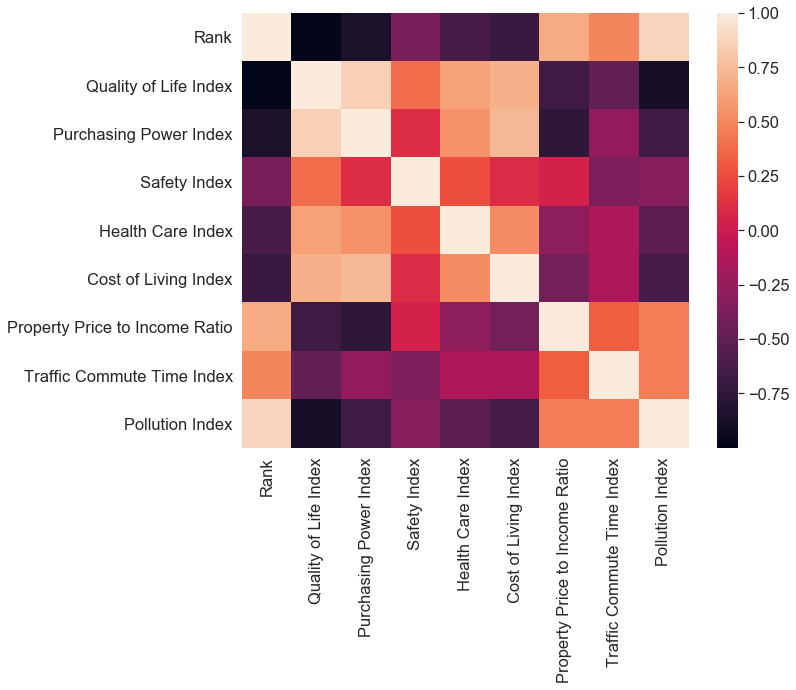

In [57]:
numbeo_city_data = load_numbeo_city_data().loc[2019]
corr = numbeo_city_data.corr(method='spearman')
corr_coefficient_cost_of_living = corr['Rank']['Cost of Living Index']
print('Correlation coefficient for Rank and Cost of Living Index ' + str(corr_coefficient_cost_of_living))
corr_coefficient_pollution = corr['Rank']['Pollution Index']
print('Correlation coefficient for Rank and Pollution Index ' + str(corr_coefficient_pollution))
corr_coefficient_purchasing = corr['Rank']['Purchasing Power Index']
print('Correlation coefficient for Rank and Purchasing Power Index ' + str(corr_coefficient_purchasing))

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)

In the heatmap above, very dark violet areas suggest a high negative correlation and very bright red/beige areas suggest a high correlation.
The correlation coefficient for Rank and Cost of Living Index in 2019 is -0.7. That indicates that there is a negative correlation between those values, as that correlation coefficient is statistically significant. The correlation between Rank and Pollution Index is 0.88, which is very high. That raises the suspicion that the pollution affects the Rank heavily. The suspicion is confirmed by looking at the formula, which is used to calculate the Quality of Life Index on Numbeo. Furthermore, it is visible in the heatmap that there is a high correlation between Rank and Purchasing Power Index (-0.86), which can also be confirmed by looking at the impact of the Purchasing Power Index on the Quality of Life Index in the used formula.

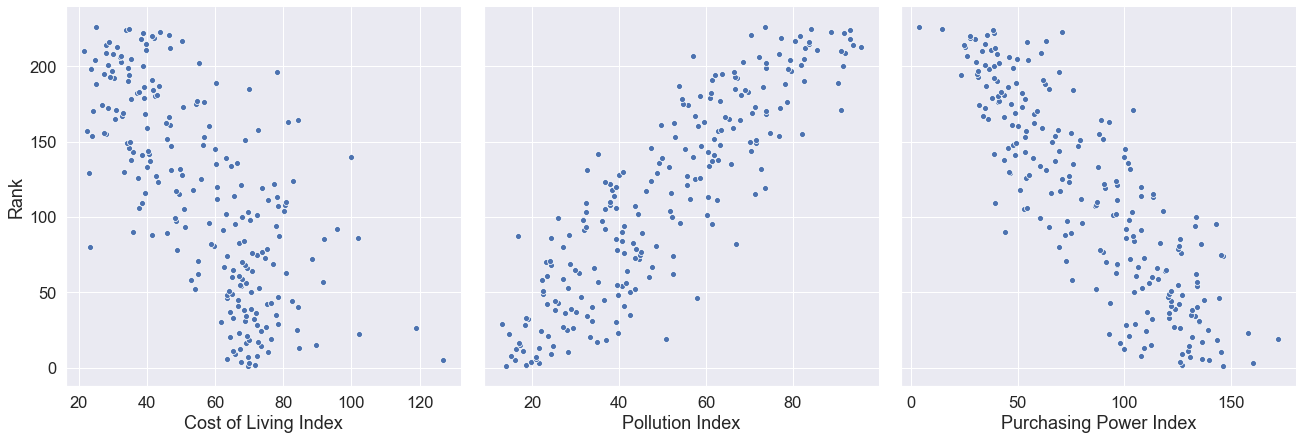

In [58]:
numbeo_city_data = load_numbeo_city_data().loc[2019]

sns.set(font_scale=1.5)
sns.pairplot(numbeo_city_data,  x_vars=["Cost of Living Index", "Pollution Index", "Purchasing Power Index"],
                 y_vars=["Rank"], height=6)


These three indices are the ones, which have the highest correlation with the Rank. It can be seen that cost of living has the worst correlation coefficient of these three, because the values in the left plot are spread more than in the other two plots. Rank and Pollution Index are positively correlated, whereas Rank and Purchasing Power Index are negatively correlated.

## Correlation over the years

In [ ]:
years = range(2012, 2020, 1)
numbeo_city_data = load_numbeo_city_data()
correlation_data = []
for x in years:
    data = numbeo_city_data.loc[x].corr(method='spearman')
    corr_coefficient_cost_of_living = data['Rank']['Cost of Living Index']
    correlation_data.append(corr_coefficient_cost_of_living)
    
sns.set(font_scale=1)
fig = plt.figure(figsize=(10, 3), dpi=100)
plt.plot(years, correlation_data, label='Correlation coefficient')
plt.xlabel('Year')
plt.ylabel('Correlation coefficient')
plt.title('Correlation between Rank and Cost of Living from 2012 to 2019')
plt.legend()
plt.show()


This plot shows the changes of the correlation coefficient over the years. It can be seen that the negative correlation between the Quality of Life rank of the city and the Cost of Living is getting stronger, from 2017, but especially from 2017 to 2019 it made a huge jump. That is, because the formula for the Quality of Life Index was changed to be affected by the cost of living in 2017 and used from 2018 on.

### Conclusion

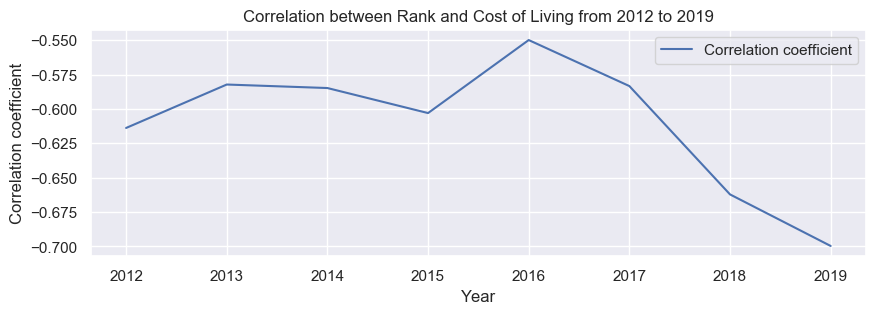

In [66]:
years = range(2012, 2020, 1)
numbeo_city_data = load_numbeo_city_data()
correlation_data = []
for x in years:
    data = numbeo_city_data.loc[x].corr(method='spearman')
    corr_coefficient_cost_of_living = data['Rank']['Cost of Living Index']
    correlation_data.append(corr_coefficient_cost_of_living)
    
sns.set(font_scale=1)
fig = plt.figure(figsize=(10, 3), dpi=100)
plt.plot(years, correlation_data, label='Correlation coefficient')
plt.xlabel('Year')
plt.ylabel('Correlation coefficient')
plt.title('Correlation between Rank and Cost of Living from 2012 to 2019')
plt.legend()
plt.show()


This plot shows the changes of the correlation coefficient over the years. It can be seen that the negative correlation between the Quality of Life rank of the city and the Cost of Living is getting stronger, from 2017, but especially from 2017 to 2019 it made a huge jump. That is, because the formula for the Quality of Life Index was changed to be affected by the cost of living in 2017 and used from 2018 on.

### Conclusion

The Quality of Life ranking is heavily impacted by the Pollution Index and Purchasing Power Index. Cost of living does not impact Qualify of Life Index as much as the other two, however the correlation coefficient for 2019 is pretty high with  0.7, which indicates that there is a correlation.